In [225]:
import numpy as np
import pandas as pd
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

In [226]:
# Reading the Dataset

df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [227]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [134]:
print(X.shape)

(150, 4)


In [320]:
G = nx.Graph()
G = nx.from_pandas_edgelist(X, 'sepal_length', 'petal_length')

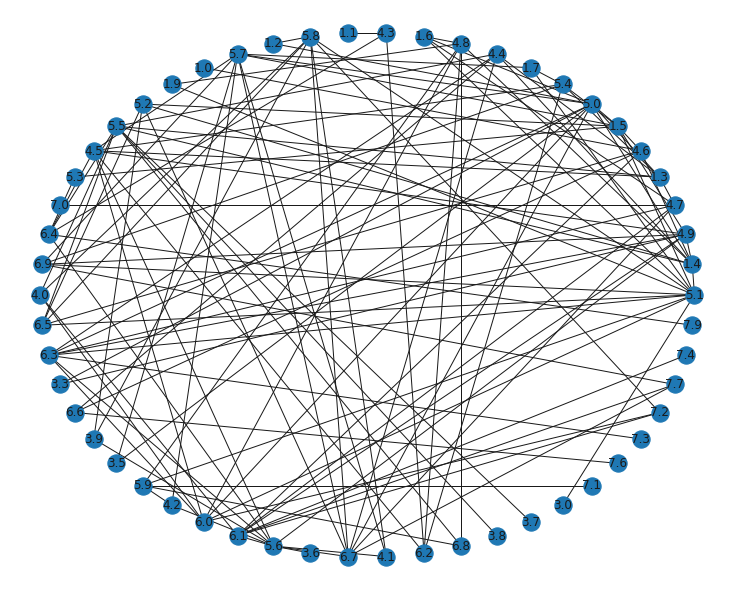

In [321]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [322]:
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [323]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

In [324]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.901, 1.032, -1.341, -1.313],
       [-1.143, -0.125, -1.341, -1.313],
       [-1.385, 0.338, -1.398, -1.313],
       [-1.507, 0.106, -1.284, -1.313],
       [-1.022, 1.263, -1.341, -1.313]])

In [652]:
W = pairwise_distances(X_scaled, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 0.3 else 0)
W = np.vectorize(vectorizer)(W)
print(W.shape)
print(W)

(150, 150)
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [653]:
import scipy
print(W.shape)
sparse_csr_mat = scipy.sparse.csr_matrix(W)
print(sparse_csr_mat.shape)
print(W == sparse_csr_mat)

(150, 150)
(150, 150)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [654]:
G = nx.algorithms.bipartite.matrix.from_biadjacency_matrix(sparse_csr_mat)

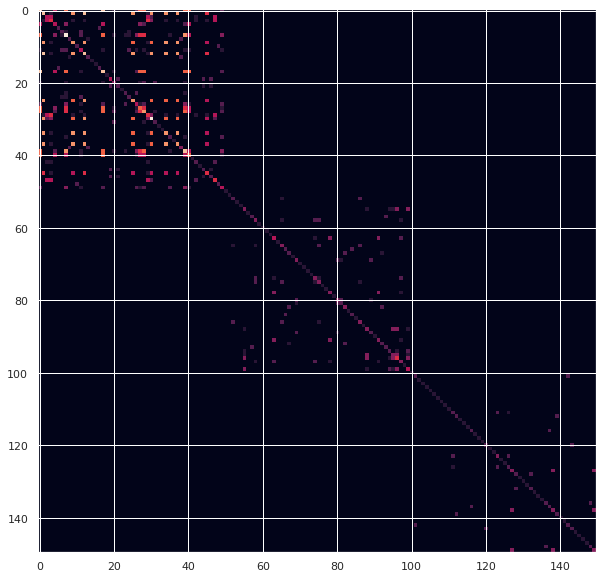

In [655]:
new_X = W.dot(W.T)
fig = pyplot.figure(figsize=(10, 10))  # in inches
pyplot.imshow(new_X,
              
              interpolation="none", aspect = 'auto')
pyplot.show()

In [656]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

In [657]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)
    pyplot.show()



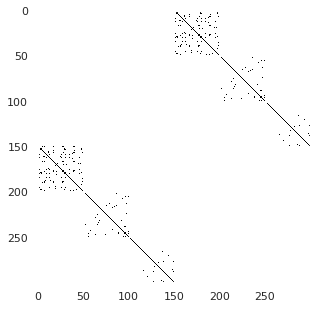

In [658]:
# G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_adjacency_matrix(G)

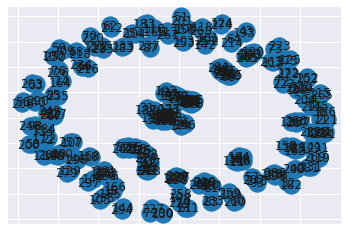

In [659]:
from matplotlib import pyplot, patches
# G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_graph(G)
# W = nx.adjacency_matrix(G)
# print(W.todense())
# print(W.shape)

In [660]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

print(L.shape)

degree matrix:
[[8 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 3]]
laplacian matrix:
[[7 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
(150, 150)


In [661]:
e, v = np.linalg.eig(L)# eigenvalues
print('eigenvalues:')
print(e)# eigenvectors
print('eigenvectors:')
print(v[4])
l = np.sort(e)
print(l[0])


eigenvalues:
[ 9.42193252e+00+0.00000000e+00j  8.51878607e+00+0.00000000e+00j
  7.70894723e+00+0.00000000e+00j  6.23997894e+00+0.00000000e+00j
  5.46235096e+00+0.00000000e+00j  9.40664238e+00+0.00000000e+00j
  8.00000000e+00+0.00000000e+00j  6.76591850e+00+0.00000000e+00j
  7.00000000e+00+0.00000000e+00j  3.58955032e+00+0.00000000e+00j
  2.61839995e+00+0.00000000e+00j  2.39725332e+00+0.00000000e+00j
  3.62968325e+00+0.00000000e+00j  5.05473975e+00+0.00000000e+00j
  5.00000000e+00+0.00000000e+00j  8.00000000e+00+0.00000000e+00j
  8.00000000e+00+0.00000000e+00j  7.54944521e-01+0.00000000e+00j
  3.84485635e-01+0.00000000e+00j  2.73687286e-01+0.00000000e+00j
  4.19950558e+00+0.00000000e+00j  4.00000000e+00+0.00000000e+00j
  7.00000000e+00+0.00000000e+00j  5.10709638e+00+0.00000000e+00j
  1.18264965e+00+0.00000000e+00j  4.23566039e+00+0.00000000e+00j
  3.90544137e-01+0.00000000e+00j  2.50638370e+00+0.00000000e+00j
  3.22554405e+00+0.00000000e+00j  3.76775726e+00+0.00000000e+00j
  4.00000000

In [662]:

sorted_value_vector = v[e.argsort()]
sorted_e = (np.sort(e))
# print(list(e))
print(sorted_e)
for x in range(len(sorted_e)):
    if(sorted_e[x] > 0):
        print(sorted_e[x])
        i = x
        break
# i = len(sorted_e) - 1
# i = i + 1
# print(sorted_e)
print(sorted_e[i])
# print(sorted_value_vector[i].shape)
projected_1 = sorted_value_vector[i]
print(projected_1)

[-8.50756734e-16+0.00000000e+00j -6.96343237e-16+0.00000000e+00j
 -3.26548013e-16+0.00000000e+00j -2.15523403e-16-1.45940271e-16j
 -2.15523403e-16+1.45940271e-16j -1.14513342e-16-2.53476590e-17j
 -1.14513342e-16+2.53476590e-17j -4.41869904e-18-1.95747319e-16j
 -4.41869904e-18+1.95747319e-16j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

In [663]:
sorted_fiedler_vector = X_scaled[projected_1.argsort()]
print(sorted_fiedler_vector.shape)
print(X_scaled.shape)
print(l.shape)
# projected_1 = X.dot(sorted_value_vector[i].T)
# print(L.shape)
print(X_scaled == sorted_fiedler_vector)

(150, 4)
(150, 4)
(150,)
[[ True  True  True  True]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [ True False False False]
 [False False False False]
 [False  True False False]
 [F

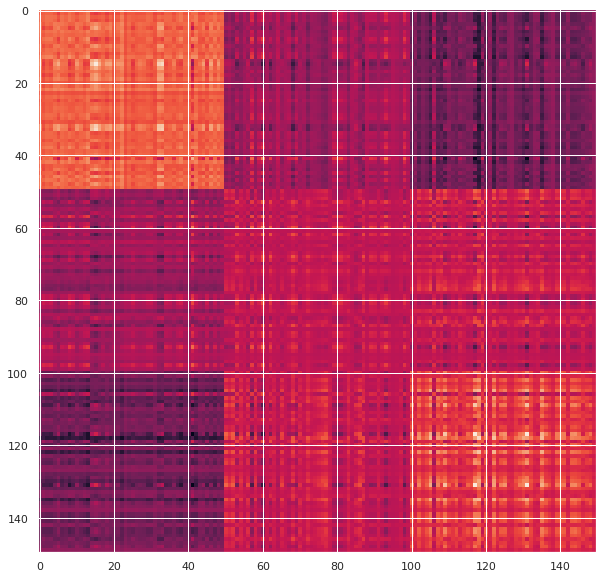

In [664]:
W = X_scaled.dot(X_scaled.T)
fig = pyplot.figure(figsize=(10, 10))  # in inches
pyplot.imshow(W,
              
              interpolation="none", aspect = 'auto')
pyplot.show()

In [665]:

new_m = sorted_fiedler_vector.dot(sorted_fiedler_vector.T)


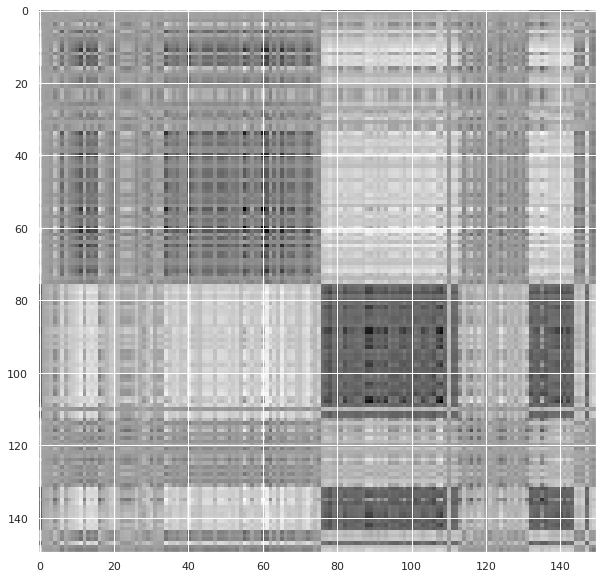

In [673]:
fig = pyplot.figure(figsize=(10, 10))  # in inches
pyplot.imshow(new_m,
              cmap = 'Greys',
              interpolation="none", aspect = 'auto')
pyplot.show()

TypeError: Image data of dtype complex128 cannot be converted to float

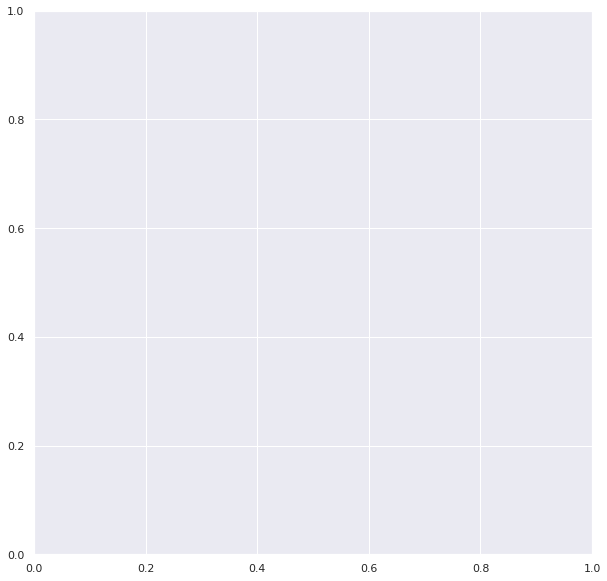

In [667]:
new_X = sorted_value_vector.dot(sorted_value_vector.T)
fig = pyplot.figure(figsize=(10, 10))  # in inches
pyplot.imshow(new_X,
              cmap="Greys",
              interpolation="none", aspect = 'auto')
pyplot.show()

In [565]:
print(list(e))
i = list(e).index(20.227202729744718+0j)
print(v[i])

[3.0, -2.220446049250313e-16, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


ValueError: (20.227202729744718+0j) is not in list

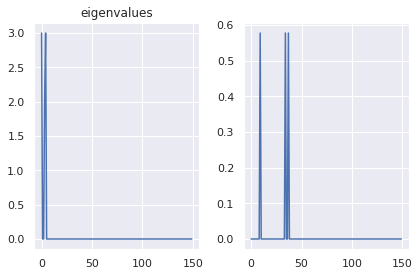

In [566]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()